In [5]:
import pandas as pd
from pmdarima import auto_arima
data=pd.read_csv('/content/Light_Rail_Patronage (2).csv',parse_dates=True)
data

,Date,MyWay,Paper Ticket,Total
0,14/09/2020,8156,203,8359
1,15/09/2020,8387,213,8600
2,20/09/2020,2766,172,2938
3,17/09/2020,8409,191,8600
4,19/09/2020,4575,373,4948
...,...,...,...,...
626,08/01/2021,7926,427,8353
627,09/01/2021,4647,391,5038
628,10/01/2021,2498,143,2641
629,11/01/2021,6153,167,6320


In [120]:
! pip install pmdarima

# **1.PRELIMINARY MODEL**

In [7]:
x=[]
y=[]
z=[]
for i in data['Date'].str.split('/'):
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
d=pd.DataFrame([x,y,z])
d=d.T
s=[]
for i,j,k in zip(d[0],d[1],d[2]):
    s.append(pd.Timestamp(day=int(i),month=int(j),year=int(k)))
data['Date']=s
data=data.sort_values('Date')

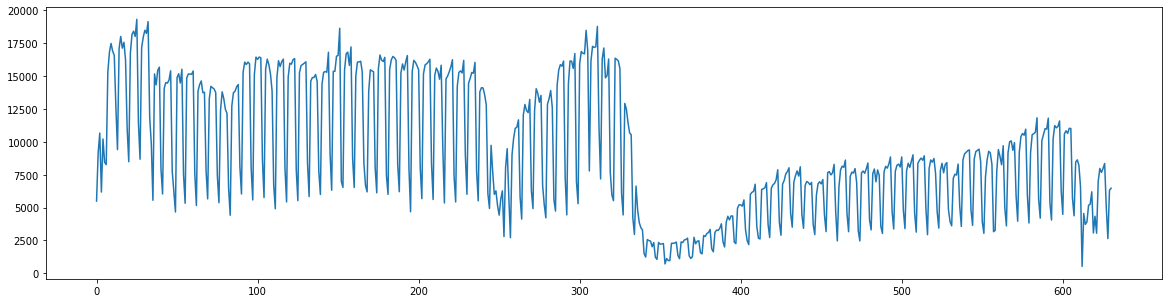

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot([i for i in range(0,631)],data['Total'])

In [9]:
data=data[['Total','Date']]
data=data.set_index('Date')
data.index=pd.to_datetime(data.index)
data=data.asfreq('d')
data=data.fillna(method='bfill')

# **2.FORECASTING ALGORITHM**

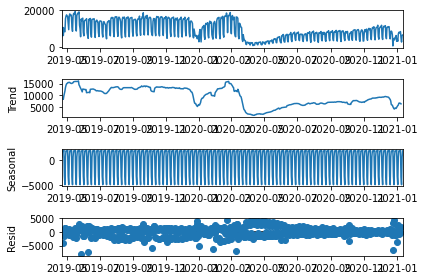

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data,model='additive')
result.plot();

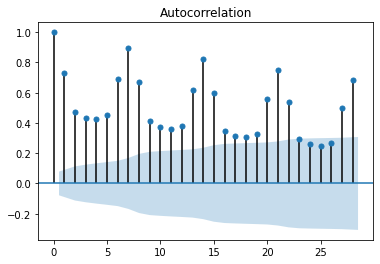

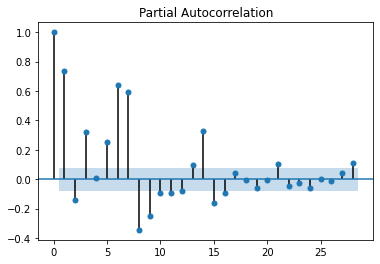

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Total'][0:624]);
plot_pacf(data['Total'][0:624]);

In [12]:
from statsmodels.tsa.stattools import adfuller as ad
ad(data['Total'][0:624])

(-2.251477363019489,
 0.18809507294796285,
 15,
 608,
 {'1%': -3.4411511898545206,
  '10%': -2.569307861950312,
  '5%': -2.866305414688104},
 10631.814662353485)

In [77]:
import warnings
warnings.filterwarnings('ignore')
from pmdarima import auto_arima
ar=auto_arima(data['Total'][0:-7],startp=0,startq=0,max_p=5,max_q=5,seasonal=True,trace=True,m=7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=11999.469, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=11241.097, Time=1.55 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=11610.666, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=11997.471, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=12001.449, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=11692.256, Time=0.81 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=11323.764, Time=0.52 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=11199.475, Time=1.33 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=11882.855, Time=0.15 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=11052.7

In [78]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  625
Model:             SARIMAX(3, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -5507.877
Date:                             Wed, 13 Jan 2021   AIC                          11029.753
Time:                                     15:08:20   BIC                          11060.807
Sample:                                          0   HQIC                         11041.820
                                             - 625                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8385     16.248     -0.236      0.813     -35.684      28.007
ar.L1         -0.4445      0.023    -19.391      0.000      -0.489      -0.400
ar.L2         -0.2983      0.035     -8.450      0.000      -0.367      -0.229
ar.L3         -0.1839      0.045     -4.130      0.000      -0.271      -0.097
ar.S.L7        0.9817      0.006    163.951      0.000       0.970       0.993
ma.S.L7       -0.6451      0.023    -28.532      0.000      -0.689      -0.601
sigma2      2.669e+06   7.79e+04     34.247      0.000    2.52e+06    2.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):              2662.85
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
train=data['Total'][0:624]
test=data['Total'][624:631]
start=len(train)
end=len(train)+len(test)-1

**MODEL-Auto Regressive Integrated Moving Average[ARIMA]**

In [88]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model=ARIMA(train,order=(3,1,0)).fit()

In [89]:
y_pred=model.predict(start,end)

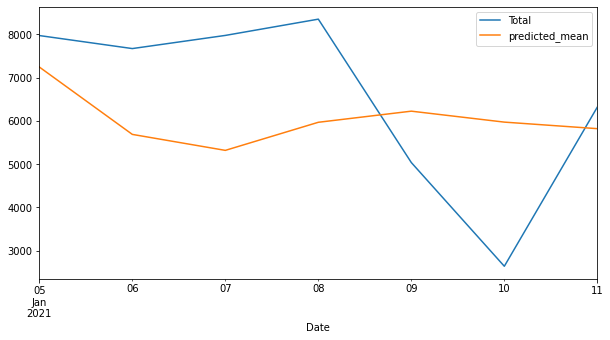

In [90]:
test.plot(figsize=(10,5),legend=True)
y_pred.plot(legend=True)

In [91]:
test.mean(),y_pred.mean()

(6568.0, 6034.924789677412)

In [128]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs
mse(test,y_pred),rmse(test,y_pred),meanabs(test,y_pred)

(4281590.154175547, 2069.2003658842577, 1824.4301214173433)

**MODEL-Seasonal Auto Regressive Integrated Moving Average[SARIMAX]**

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

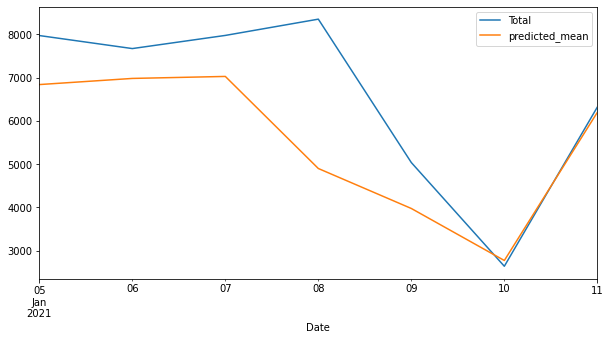

In [96]:
model=SARIMAX(train,order=(3,1,0),seasonal_order=(1, 0, 1, 7)).fit()
ys_pred=model.predict(624,630)
data['Total'][624:631].plot(figsize=(10,5),legend=True)
ys_pred.plot(legend=True)

In [127]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs
mse(test,ys_pred),rmse(test,ys_pred),meanabs(test,ys_pred)

(2248373.823131286, 1499.457843065715, 1077.2004227271539)

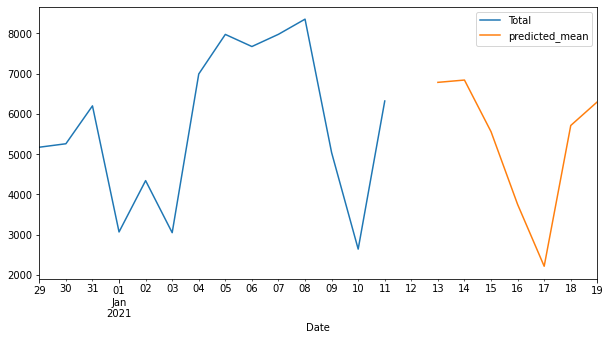

In [100]:
x=SARIMAX(data['Total'],order=(3,1,0),seasonal_order=(1, 0, 1, 7)).fit()
xx=x.predict(632,638)
data['Total'][617:631].plot(figsize=(10,5),legend=True)
xx.plot(legend=True)


In [101]:
Future_prediction =xx
Future_prediction

2021-01-13    6783.074346
2021-01-14    6840.293482
2021-01-15    5557.266831
2021-01-16    3750.681601
2021-01-17    2215.234610
2021-01-18    5711.706244
2021-01-19    6299.821716
Freq: D, Name: predicted_mean, dtype: float64

In [121]:
result=pd.DataFrame(Future_prediction)
result=result.rename(columns={'predicted_mean':'TOTAL PATRONAGES'})
result


,TOTAL PATRONAGES
DATES,
2021-01-13,6783.074346
2021-01-14,6840.293482
2021-01-15,5557.266831
2021-01-16,3750.681601
2021-01-17,2215.234610
2021-01-18,5711.706244
2021-01-19,6299.821716


# **3.CONFIDENCE OF MODEL PREDICTION**

In [125]:
#ARIMA
import statsmodels.api as sm
sm.stats.DescrStatsW(y_pred).zconfint_mean()

(5587.436457872462, 6482.413121482363)

In [126]:
#SARIMAX
import statsmodels.api as sm
sm.stats.DescrStatsW(ys_pred).zconfint_mean()

(4284.523245234287, 6773.0776800448375)